In [9]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"  # Only GPU 1 will be visible to PyTorch

In [4]:
import torch
print(torch.__version__)

2.5.1+cu121


In [5]:
from sam3.model_builder import build_sam3_image_model

In [6]:
import os
os.environ["HF_HOME"] = "/home/student/.cache/huggingface"  # optional, default cache

In [12]:
os.getcwd()

'/data/sam3'

In [8]:
import os

from torchvision import transforms
from PIL import Image
import torch
from sam3.model_builder import build_sam3_image_model
from sam3.train.transforms.basic_for_api import ComposeAPI, RandomResizeAPI, ToTensorAPI, NormalizeAPI
from sam3.model.utils.misc import copy_data_to_device
from matplotlib import pyplot as plt
import matplotlib.patches as patches

device = "cuda"

# Path to sam3 repo root
bpe_path = "./assets/bpe_simple_vocab_16e6.txt.gz"


# Load model
model = build_sam3_image_model(bpe_path=bpe_path)
model.to(device)
model.eval()

image_path = "./insect9.jpg"
image = Image.open(image_path).convert("RGB")

transform_simple = transforms.Compose([
    transforms.Resize((1024, 1024)),  # match SAM3 input size
    transforms.ToTensor()
])

image_tensor = transform_simple(image).unsqueeze(0)  # add batch dim
image_tensor = image_tensor.to(device)

# Text prompt
text_prompt = ["insects"]

# Forward pass with prompt
with torch.inference_mode():
    outputs = model(image_tensor, text=text_prompt)

# outputs['pred_masks'] or similar contains mask predictions
# visualize masks
masks = outputs['pred_masks'][0].detach().cpu()  # first image in batch
scores = outputs.get('pred_scores', None)

# Plot image with masks
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(image)

for i in range(masks.shape[0]):
    mask = masks[i].numpy()
    # simple overlay
    ax.imshow(mask, alpha=0.4)  # semi-transparent mask
plt.axis('off')
plt.show()


TypeError: Sam3Image.forward() got an unexpected keyword argument 'text'

In [6]:
import os
from PIL import Image
import torch
from sam3.model_builder import build_sam3_image_model
from sam3.visualization_utils import plot_results
from sam3.model.sam3_image_processor import Sam3Processor


# Use GPU
device = "cuda"

# Path to SAM3 assets
bpe_path = "./assets/bpe_simple_vocab_16e6.txt.gz"
image_path = "./insect9.jpg"

# Build model and move to GPU
model = build_sam3_image_model(
    bpe_path=bpe_path,
    variant="vit_b")
model.to(device)
model.eval()

# Load image
image = Image.open(image_path).convert("RGB")

# Create SAM3 processor
processor = Sam3Processor(model, confidence_threshold=0.5)

# Set image and get initial inference state
inference_state = processor.set_image(image)

# Reset any previous prompts (optional)
processor.reset_all_prompts(inference_state)

# Add a text prompt
inference_state = processor.set_text_prompt(inference_state, prompt="insects")

# Visualize results
plot_results(image, inference_state)

TypeError: build_sam3_image_model() got an unexpected keyword argument 'variant'

In [1]:
!nvidia-smi

Mon Dec  8 00:04:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.163.01             Driver Version: 550.163.01     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA TITAN Xp                Off |   00000000:03:00.0 Off |                  N/A |
| 23%   24C    P8              8W /  250W |       2MiB /  12288MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [21]:
!nvidia-smi pmon -c 1

    0          -     -      -      -      -      -      -      -    -              
    1          -     -      -      -      -      -      -      -    -              


In [19]:
!ps aux | grep python

student        1  0.1  0.1 835824 178232 ?       Ssl  Oct14  62:30 /opt/conda/bin/python /opt/conda/bin/jupyter-lab --ip=0.0.0.0
student     2446  2.4  3.3 41425696 4446092 ?    Ssl  Oct20 1236:33 /opt/conda/bin/python -m ipykernel_launcher -f /home/student/.local/share/jupyter/runtime/kernel-0ecab596-006e-474b-92a0-4a07b46308a0.json
student     3932  0.0  0.0 760436 125636 ?       Ssl  Oct20   1:18 /opt/conda/bin/python -m ipykernel_launcher -f /home/student/.local/share/jupyter/runtime/kernel-f9a8d645-bf96-45ba-9dfc-ef66ee360a26.json
student     6002  0.0  0.1 4620132 218380 ?      Ssl  Oct20   1:21 /opt/conda/bin/python -m ipykernel_launcher -f /home/student/.local/share/jupyter/runtime/kernel-0bb56220-f260-44d2-b930-ee7f44292b04.json
student     8163  0.0  0.0      0     0 pts/5    Z    Nov04   0:03 [python3] <defunct>
student     8195  0.0  0.0 688140 14848 ?        Ssl  Nov04   0:52 /opt/conda/bin/python -m ipykernel_launcher -f /home/student/.local/share/jupyter/runtime/kernel-0

In [19]:
!nvidia-smi -q -d PIDS


==============NVSMI LOG==============

Timestamp                                 : Sun Dec  7 21:30:06 2025
Driver Version                            : 550.163.01
CUDA Version                              : 12.4

Attached GPUs                             : 2
GPU 00000000:03:00.0
    Processes
        GPU instance ID                   : N/A
        Compute instance ID               : N/A
        Process ID                        : 250935
            Type                          : C
            Name                          : 
            Used GPU Memory               : 3570 MiB
        GPU instance ID                   : N/A
        Compute instance ID               : N/A
        Process ID                        : 1290170
            Type                          : C
            Name                          : 
            Used GPU Memory               : 5848 MiB

GPU 00000000:83:00.0
    Processes
        GPU instance ID                   : N/A
        Compute instance ID           

In [46]:
import torch, gc

# Clear GPU cache
torch.cuda.empty_cache()

# Collect garbage
gc.collect()

8

In [47]:
print(torch.cuda.current_device())

0


In [48]:
print(torch.cuda.get_device_name(torch.cuda.current_device()))

NVIDIA TITAN Xp


In [52]:
!kill -9 153348

/usr/bin/sh: 1: kill: No such process



In [ ]:
## kill the terminal to restart kernal and clear the memory
!pkill -f ipykernel

In [2]:
!nvidia-smi

Wed Dec  3 22:19:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.163.01             Driver Version: 550.163.01     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA TITAN Xp                Off |   00000000:03:00.0 Off |                  N/A |
| 23%   25C    P8              9W /  250W |       2MiB /  12288MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

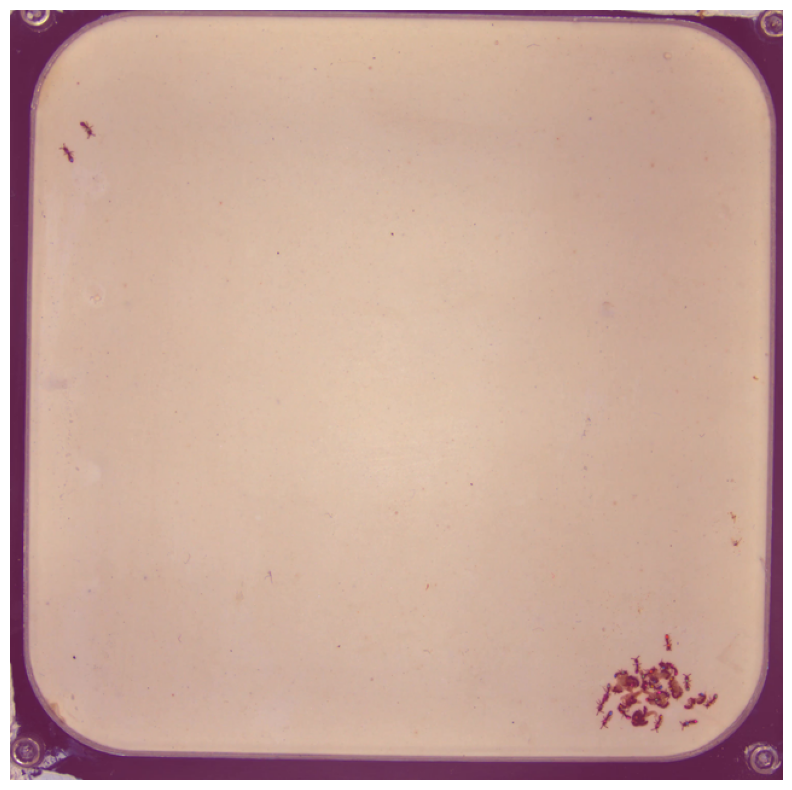

3727

In [4]:
import torch
from PIL import Image
from sam3.model_builder import build_sam3_image_model
from sam3.model.sam3_image_processor import Sam3Processor
import matplotlib.pyplot as plt
import numpy as np
import gc

device = "cuda:0"
bpe_path = "./assets/bpe_simple_vocab_16e6.txt.gz"
image_path = "./insect9.jpg"
max_size = 640

# Build model
model = build_sam3_image_model(bpe_path=bpe_path)
model.to(device)
model.eval()

# Load and resize image
image = Image.open(image_path).convert("RGB")
image.thumbnail((max_size, max_size), Image.Resampling.LANCZOS)
img_w, img_h = image.size

# Create processor
processor = Sam3Processor(model, device=device, confidence_threshold=0.5)

# Run inference
with torch.autocast(device_type="cuda", dtype=torch.bfloat16):
    with torch.inference_mode():
        state = processor.set_image(image)
        processor.reset_all_prompts(state)
        state = processor.set_text_prompt("insects", state)

# Retrieve results from state["instances"]
instances = state.get("instances", {})
pred_masks = instances.get("pred_masks", [])
pred_labels = instances.get("pred_labels", [])
pred_scores = instances.get("pred_scores", [])

# Print labels and scores
for i, (label, score) in enumerate(zip(pred_labels, pred_scores)):
    print(f"Object {i}: Label='{label}', Score={score}")

# Visualize masks (no labels)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(image)

for mask in pred_masks:
    mask_np = mask.detach().cpu().numpy()
    mask_resized = np.array(Image.fromarray((mask_np * 255).astype(np.uint8)).resize((img_w, img_h))) / 255.0
    ax.imshow(mask_resized, alpha=0.4)

plt.axis('off')
plt.show()

# Cleanup to avoid OOM
del state, pred_masks, pred_scores
torch.cuda.empty_cache()
gc.collect()


Detected labels and confidences:


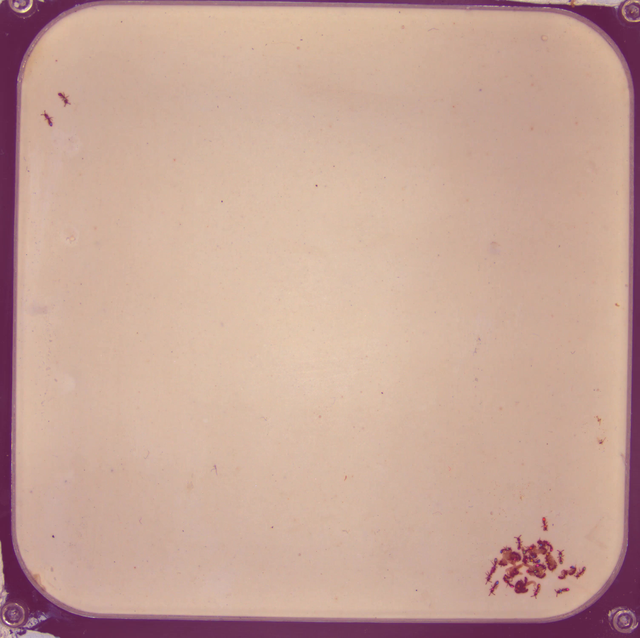

In [2]:
import torch
from PIL import Image, ImageDraw
from torchvision import transforms

from sam3.model_builder import build_sam3_image_model
from sam3.model.sam3_image_processor import Sam3Processor

# Custom function: Draw only bounding boxes
def draw_boxes(image, boxes, color="red", width=3):
    draw = ImageDraw.Draw(image)
    for box in boxes:
        # SAM3 boxes assumed in [x1, y1, x2, y2] format
        draw.rectangle(box, outline=color, width=width)
    return image

# -----------------------------
# Config
# -----------------------------
device = "cuda:0"
bpe_path = "./assets/bpe_simple_vocab_16e6.txt.gz"
image_path = "./insect9.jpg"
output_image_path = "./output_with_boxes.jpg"

# -----------------------------
# Build model
# -----------------------------
model = build_sam3_image_model(bpe_path=bpe_path)
model.to(device)
model.eval()

# -----------------------------
# Load and resize image
# -----------------------------
image = Image.open(image_path).convert("RGB")
max_size = 640
image.thumbnail((max_size, max_size), Image.Resampling.LANCZOS)

# -----------------------------
# Create processor
# -----------------------------
processor = Sam3Processor(model, device=device, confidence_threshold=0.5)

# -----------------------------
# Run inference
# -----------------------------
with torch.autocast(device_type="cuda", dtype=torch.bfloat16):
    with torch.inference_mode():
        state = processor.set_image(image)
        processor.reset_all_prompts(state)
        state = processor.set_text_prompt("insects", state)

# -----------------------------
# Extract results and print info
# -----------------------------

# Assumes `state` has attribute "detections" or similar. Adjust to your actual data structure.
# Each detection contains "label", "score", and "bbox"
labels_printed = []
boxes = []

for det in getattr(state, "detections", []):
    label = det["label"]
    score = det["score"]
    bbox = det["bbox"]
    labels_printed.append((label, score))
    boxes.append(bbox)

print("Detected labels and confidences:")
for label, score in labels_printed:
    print(f"{label}: {score:.2f}")

# -----------------------------
# Visualize: only boxes, no labels
# -----------------------------
image_boxes = image.copy()
draw_boxes(image_boxes, boxes, color="red", width=3)
image_boxes.save(output_image_path)
image_boxes.show()


Detected 10 objects
Object 0: Label='insects', Score=0.789
Object 1: Label='insects', Score=0.809
Object 2: Label='insects', Score=0.805
Object 3: Label='insects', Score=0.871
Object 4: Label='insects', Score=0.832
Object 5: Label='insects', Score=0.883
Object 6: Label='insects', Score=0.840
Object 7: Label='insects', Score=0.777
Object 8: Label='insects', Score=0.871
Object 9: Label='insects', Score=0.848


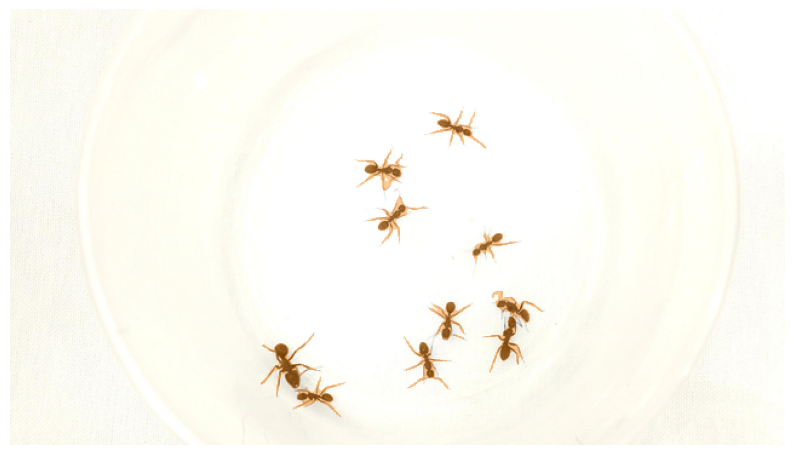

23

In [21]:
import torch
from PIL import Image
from sam3.model_builder import build_sam3_image_model
from sam3.model.sam3_image_processor import Sam3Processor
import matplotlib.pyplot as plt
import numpy as np
import gc
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


device = "cuda:0"
bpe_path = "./assets/bpe_simple_vocab_16e6.txt.gz"
image_path = "./000328.jpg"
max_size = 640

# Build model
model = build_sam3_image_model(bpe_path=bpe_path)
model.to(device)
model.eval()

# Load and resize
image = Image.open(image_path).convert("RGB")
image.thumbnail((max_size, max_size), Image.Resampling.LANCZOS)
img_w, img_h = image.size

# Create processor
processor = Sam3Processor(model, device=device, confidence_threshold=0.51)

# Inference
with torch.autocast(device_type="cuda", dtype=torch.bfloat16):
    with torch.inference_mode():
        state = processor.set_image(image)
        processor.reset_all_prompts(state)
        state = processor.set_text_prompt("insects", state)

# Retrieve masks, boxes, scores
pred_masks = state.get("masks", [])        # boolean masks [N, H, W]
pred_scores = state.get("scores", [])      # confidence scores [N]

print(f"Detected {len(pred_masks)} objects")
for i, score in enumerate(pred_scores):
    print(f"Object {i}: Label='insects', Score={score:.3f}")

# Visualize masks only (original image stays visible)
# image: PIL Image
# pred_masks: list of masks [H, W] as tensors
# img_w, img_h = original image size

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(image)  # original image

# Convert image to numpy array for blending
img_np = np.array(image).astype(np.float32) / 255.0  # normalize to [0,1]

mask_color = np.array([1.0, 0.5, 0.0])  # orange
alpha = 0.4  # transparency

for mask in pred_masks:
    mask_np = mask.detach().cpu().numpy() if torch.is_tensor(mask) else mask
    mask_np = np.squeeze(mask_np)  # ensure [H, W]
    mask_resized = np.array(
        Image.fromarray((mask_np * 255).astype(np.uint8)).resize((img_w, img_h))
    ) / 255.0

    # Blend mask with original image
    for c in range(3):
        img_np[:, :, c] = img_np[:, :, c] * (1 - mask_resized * alpha) + mask_resized * alpha * mask_color[c]

ax.imshow(img_np)
plt.axis('off')
plt.show()

# Cleanup to avoid OOM
del state, pred_masks, pred_scores
torch.cuda.empty_cache()
gc.collect()


Detected 10 objects
Object 0: Label='insects', Score=0.820
Object 1: Label='insects', Score=0.828
Object 2: Label='insects', Score=0.828
Object 3: Label='insects', Score=0.887
Object 4: Label='insects', Score=0.887
Object 5: Label='insects', Score=0.863
Object 6: Label='insects', Score=0.832
Object 7: Label='insects', Score=0.773
Object 8: Label='insects', Score=0.887
Object 9: Label='insects', Score=0.863


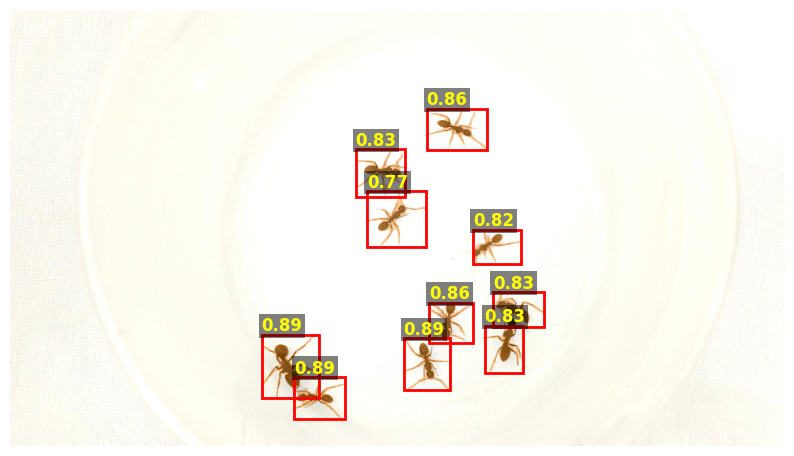

3599

In [20]:
import torch
from PIL import Image
from sam3.model_builder import build_sam3_image_model
from sam3.model.sam3_image_processor import Sam3Processor
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import gc

device = "cuda:0"
bpe_path = "./assets/bpe_simple_vocab_16e6.txt.gz"
image_path = "./000328.jpg"
max_size = 1000

# Build model
model = build_sam3_image_model(bpe_path=bpe_path)
model.to(device)
model.eval()

# Load and resize
image = Image.open(image_path).convert("RGB")
image.thumbnail((max_size, max_size), Image.Resampling.LANCZOS)
img_w, img_h = image.size

# Create processor
processor = Sam3Processor(model, device=device, confidence_threshold=0.51)

# Run inference
with torch.autocast(device_type="cuda", dtype=torch.bfloat16):
    with torch.inference_mode():
        state = processor.set_image(image)
        processor.reset_all_prompts(state)
        state = processor.set_text_prompt("insects", state)

# Retrieve masks, boxes, scores
pred_masks = state.get("masks", [])        # [N, H, W] boolean tensors
pred_boxes = state.get("boxes", [])        # [N, 4] tensors
pred_scores = state.get("scores", [])      # [N]

print(f"Detected {len(pred_masks)} objects")
for i, score in enumerate(pred_scores):
    print(f"Object {i}: Label='insects', Score={score:.3f}")

# Prepare image for blending
img_np = np.array(image).astype(np.float32) / 255.0

# Start plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(image)

# Overlay masks and bounding boxes with score
for i, mask in enumerate(pred_masks):
    # --- MASK ---
    mask_np = mask.detach().cpu().numpy() if torch.is_tensor(mask) else mask
    mask_np = np.squeeze(mask_np)
    mask_resized = np.array(
        Image.fromarray((mask_np * 255).astype(np.uint8)).resize((img_w, img_h))
    ) / 255.0

    # Blend mask color: orange-ish
    color = np.array([1.0, 0.5, 0.0])
    for c in range(3):
        img_np[:, :, c] = img_np[:, :, c] * (1 - mask_resized * 0.4) + mask_resized * 0.4 * color[c]

    # --- BOUNDING BOX ---
    if "boxes" in state:
        box = pred_boxes[i]
        box = box.detach().cpu().numpy() if torch.is_tensor(box) else box
        x0, y0, x1, y1 = box.astype(float)
        rect = patches.Rectangle(
            (x0, y0),
            x1 - x0,
            y1 - y0,
            linewidth=2,
            edgecolor='red',
            facecolor='none'
        )
        ax.add_patch(rect)

        # --- SCORE ---
        score_text = f"{pred_scores[i]:.2f}"
        ax.text(
            x0, y0 - 5,  # slightly above top-left corner
            score_text,
            color='yellow',
            fontsize=12,
            fontweight='bold',
            bbox=dict(facecolor='black', alpha=0.5, pad=2, edgecolor='none')
        )

# Show blended image
ax.imshow(img_np)
plt.axis('off')
plt.show()

# Cleanup to avoid OOM
del state, pred_masks, pred_boxes, pred_scores
torch.cuda.empty_cache()
gc.collect()


In [32]:
import os
import json
import torch
from PIL import Image
from sam3.model_builder import build_sam3_image_model
from sam3.model.sam3_image_processor import Sam3Processor
import numpy as np
import gc

# ==========================
# CONFIG
# ==========================

device = "cuda:0"
bpe_path = "./assets/bpe_simple_vocab_16e6.txt.gz"
images_folder = "../data/flatbug-dataset/cao2022"            # folder with input images
output_json = "./sam3_results_cao2022.json"   # output COCO json
prompt_text = "insects"
max_size = 640
category_id = 1                       # you decide category number

# ==========================
# INIT MODEL
# ==========================

model = build_sam3_image_model(bpe_path=bpe_path)
model.to(device)
model.eval()

processor = Sam3Processor(model, device=device, confidence_threshold=0.5)

# ==========================
# COCO STRUCTURE
# ==========================

coco_output = {
    "images": [],
    "annotations": [],
    "categories": [
        {
            "id": category_id,
            "name": prompt_text
        }
    ]
}

annotation_id = 1
image_id = 1

# ==========================
# FUNCTION: mask → polygon
# ==========================

def mask_to_polygon(mask_np):
    """
    Converts binary mask into polygon segmentation.
    SAM3 mask is [H,W], convert to contours (COCO polygons).
    """
    import cv2

    mask_uint8 = (mask_np * 255).astype(np.uint8)
    contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    polygons = []
    for cnt in contours:
        if len(cnt) >= 3:
            poly = cnt.reshape(-1).tolist()
            polygons.append(poly)

    return polygons


# ==========================
# PROCESS EACH IMAGE
# ==========================

for filename in os.listdir(images_folder):

    if not filename.lower().endswith((".jpg", ".jpeg", ".png")):
        continue

    img_path = os.path.join(images_folder, filename)
    image = Image.open(img_path).convert("RGB")
    image.thumbnail((max_size, max_size), Image.Resampling.LANCZOS)
    img_w, img_h = image.size

    print(f"\nProcessing: {filename}")

    # --------------------------
    # RUN SAM3
    # --------------------------
    with torch.autocast(device_type="cuda", dtype=torch.bfloat16):
        with torch.inference_mode():
            state = processor.set_image(image)
            processor.reset_all_prompts(state)
            state = processor.set_text_prompt(prompt_text, state)

    masks = state.get("masks", [])
    boxes = state.get("boxes", [])
    scores = state.get("scores", [])

    # --------------------------
    # ADD IMAGE ENTRY
    # --------------------------
    coco_output["images"].append({
        "id": image_id,
        "file_name": filename,
        "width": img_w,
        "height": img_h
    })

    # --------------------------
    # PROCESS EACH DETECTED OBJECT
    # --------------------------
    for idx, mask in enumerate(masks):

        # --- bbox ---
        box = boxes[idx].detach().cpu().tolist()  # [x0, y0, x1, y1]
        x0, y0, x1, y1 = box
        w = x1 - x0
        h = y1 - y0

        # --- mask resize to image size ---
        mask_np = mask.detach().cpu().numpy()
        mask_np = np.squeeze(mask_np)
        mask_resized = np.array(
            Image.fromarray((mask_np * 255).astype(np.uint8)).resize((img_w, img_h))
        ) / 255.0
        mask_resized = (mask_resized > 0.5).astype(np.uint8)

        # --- segmentation polygons ---
        seg = mask_to_polygon(mask_resized)

        if len(seg) == 0:
            continue

        # COCO annotation entry
        coco_output["annotations"].append({
            "id": annotation_id,
            "image_id": image_id,
            "category_id": category_id,
            "bbox": [float(x0), float(y0), float(w), float(h)],
            "segmentation": seg,
            "area": float(np.sum(mask_resized)),
            "iscrowd": 0,
            "score": float(scores[idx])
        })

        annotation_id += 1

    # cleanup
    del state, masks, boxes, scores
    torch.cuda.empty_cache()
    gc.collect()

    image_id += 1

# ==========================
# SAVE JSON
# ==========================

with open(output_json, "w") as f:
    json.dump(coco_output, f, indent=2)

print("\n==== DONE ====")
print(f"Saved COCO JSON → {output_json}")



Processing: 000001.jpg

Processing: 000002.jpg

Processing: 000003.jpg

Processing: 000025.jpg

Processing: 000026.jpg

Processing: 000027.jpg

Processing: 000028.jpg

Processing: 000051.jpg

Processing: 000053.jpg

Processing: 000075.jpg

Processing: 000077.jpg

Processing: 000078.jpg

Processing: 000100.jpg

Processing: 000101.jpg

Processing: 000102.jpg

Processing: 000103.jpg

Processing: 000125.jpg

Processing: 000126.jpg

Processing: 000127.jpg

Processing: 000128.jpg

Processing: 000151.jpg

Processing: 000153.jpg

Processing: 000175.jpg

Processing: 000177.jpg

Processing: 000178.jpg

Processing: 000200.jpg

Processing: 000201.jpg

Processing: 000202.jpg

Processing: 000203.jpg

Processing: 000225.jpg

Processing: 000226.jpg

Processing: 000227.jpg

Processing: 000228.jpg

Processing: 000251.jpg

Processing: 000253.jpg

Processing: 000275.jpg

Processing: 000277.jpg

Processing: 000278.jpg

Processing: 000300.jpg

Processing: 000301.jpg

Processing: 000302.jpg

Processing: 000

In [40]:
import os
import json
import gc
import torch
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import cv2

from sam3.model_builder import build_sam3_image_model
from sam3.model.sam3_image_processor import Sam3Processor


# ==========================
# CONFIG
# ==========================
device = "cuda:0"

bpe_path = "./assets/bpe_simple_vocab_16e6.txt.gz"
images_folder = "../data/flatbug-dataset/cao2022"
output_json = "./sam3_results_cao2022.json"
output_vis_folder = "./sam3_output_images/cao2022"     # NEW: folder for visualization images
prompt_text = "insects"
max_size = 640
category_id = 1

os.makedirs(output_vis_folder, exist_ok=True)


# ==========================
# INIT MODEL
# ==========================
model = build_sam3_image_model(bpe_path=bpe_path)
model.to(device).eval()
processor = Sam3Processor(model, device=device, confidence_threshold=0.5)


# ==========================
# HELPERS
# ==========================
def mask_to_polygon(mask_np):
    """Convert binary mask to COCO polygon."""
    mask_uint8 = (mask_np * 255).astype(np.uint8)
    contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    polygons = []
    for c in contours:
        if len(c) >= 3:
            polygons.append(c.reshape(-1).tolist())
    return polygons


def draw_visualization(orig_image, boxes, masks, scores, out_path):
    """Draw masks, bounding boxes, and confidence score."""
    vis = orig_image.copy()
    draw = ImageDraw.Draw(vis, "RGBA")

    # Use a readable font
    try:
        font = ImageFont.truetype("arial.ttf", 26)
    except:
        font = ImageFont.load_default()

    for i, (box, mask, score) in enumerate(zip(boxes, masks, scores)):

        # --- draw mask ---
        mask_rgba = Image.new("RGBA", vis.size, (0, 0, 0, 0))
        mask_draw = ImageDraw.Draw(mask_rgba)

        mask_coords = np.argwhere(mask == 1)
        for y, x in mask_coords:
            mask_draw.point((x, y), fill=(255, 0, 0, 90))  # red transparent

        vis = Image.alpha_composite(vis.convert("RGBA"), mask_rgba)

        # --- draw bounding box ---
        x, y, w, h = box
        draw.rectangle([x, y, x + w, y + h], outline=(0, 255, 0, 255), width=4)

        # --- draw score ---
        score_text = f"{score:.2f}"
        draw.text((x, max(0, y - 28)), score_text, fill=(255, 255, 0, 255), font=font)

    vis.convert("RGB").save(out_path)
    print(f"Saved visualization → {out_path}")


# ==========================
# COCO OUTPUT STRUCTURE
# ==========================
coco_output = {
    "images": [],
    "annotations": [],
    "categories": [{"id": category_id, "name": prompt_text}]
}

annotation_id = 1
image_id = 1


# ==========================
# PROCESS IMAGES
# ==========================
for filename in os.listdir(images_folder):
    if not filename.lower().endswith((".jpg", ".jpeg", ".png")):
        continue

    img_path = os.path.join(images_folder, filename)
    orig_image = Image.open(img_path).convert("RGB")
    orig_w, orig_h = orig_image.size

    # --- resize for SAM ---
    image = orig_image.copy()
    image.thumbnail((max_size, max_size), Image.Resampling.LANCZOS)
    img_w, img_h = image.size

    scale_x = orig_w / img_w
    scale_y = orig_h / img_h

    print(f"\nProcessing: {filename}")

    # --- run SAM3 ---
    with torch.autocast(device_type="cuda", dtype=torch.bfloat16):
        with torch.inference_mode():
            state = processor.set_image(image)
            processor.reset_all_prompts(state)
            state = processor.set_text_prompt(prompt_text, state)

    masks = state.get("masks", [])
    boxes = state.get("boxes", [])
    scores = state.get("scores", [])

    # --- add image metadata ---
    coco_output["images"].append({
        "id": image_id,
        "file_name": filename,
        "width": orig_w,
        "height": orig_h
    })

    # for visualization
    vis_bboxes = []
    vis_masks = []
    vis_scores = []

    # --- process all detections ---
    for idx, mask in enumerate(masks):

        # bbox: convert SAM format to xywh and scale
        x0, y0, x1, y1 = boxes[idx].detach().cpu().tolist()
        w = x1 - x0
        h = y1 - y0

        x0 *= scale_x
        y0 *= scale_y
        w *= scale_x
        h *= scale_y

        # mask resize to original
        mask_np = mask.detach().cpu().numpy().squeeze()
        mask_resized = np.array(
            Image.fromarray((mask_np * 255).astype(np.uint8)).resize((orig_w, orig_h))
        ) / 255.0
        mask_resized = (mask_resized > 0.5).astype(np.uint8)

        seg = mask_to_polygon(mask_resized)
        if not seg:
            continue

        # Add to COCO JSON
        coco_output["annotations"].append({
            "id": annotation_id,
            "image_id": image_id,
            "category_id": category_id,
            "bbox": [float(x0), float(y0), float(w), float(h)],
            "segmentation": seg,
            "area": float(np.sum(mask_resized)),
            "iscrowd": 0,
            "score": float(scores[idx])
        })

        # Add to visualization
        vis_bboxes.append([x0, y0, w, h])
        vis_masks.append(mask_resized)
        vis_scores.append(float(scores[idx]))

        annotation_id += 1

    # --- save visualization image ---
    out_img_path = os.path.join(output_vis_folder, f"{os.path.splitext(filename)[0]}_sam3.jpg")
    draw_visualization(orig_image, vis_bboxes, vis_masks, vis_scores, out_img_path)

    # cleanup
    del state, masks, boxes, scores
    torch.cuda.empty_cache()
    gc.collect()

    image_id += 1


# ==========================
# SAVE JSON
# ==========================
with open(output_json, "w") as f:
    json.dump(coco_output, f, indent=2)

print("\n==== DONE ====")
print(f"Saved COCO JSON → {output_json}")
print(f"Visualization images saved to → {output_vis_folder}")



Processing: 000001.jpg
Saved visualization → ./sam3_output_images/cao2022/000001_sam3.jpg

Processing: 000002.jpg
Saved visualization → ./sam3_output_images/cao2022/000002_sam3.jpg

Processing: 000003.jpg
Saved visualization → ./sam3_output_images/cao2022/000003_sam3.jpg

Processing: 000025.jpg
Saved visualization → ./sam3_output_images/cao2022/000025_sam3.jpg

Processing: 000026.jpg
Saved visualization → ./sam3_output_images/cao2022/000026_sam3.jpg

Processing: 000027.jpg
Saved visualization → ./sam3_output_images/cao2022/000027_sam3.jpg

Processing: 000028.jpg
Saved visualization → ./sam3_output_images/cao2022/000028_sam3.jpg

Processing: 000051.jpg
Saved visualization → ./sam3_output_images/cao2022/000051_sam3.jpg

Processing: 000053.jpg
Saved visualization → ./sam3_output_images/cao2022/000053_sam3.jpg

Processing: 000075.jpg
Saved visualization → ./sam3_output_images/cao2022/000075_sam3.jpg

Processing: 000077.jpg
Saved visualization → ./sam3_output_images/cao2022/000077_sam3.jpg

In [37]:
import os
import json
import torch
from PIL import Image
from sam3.model_builder import build_sam3_image_model
from sam3.model.sam3_image_processor import Sam3Processor
import numpy as np
import gc

# ==========================
# CONFIG
# ==========================
device = "cuda:0"
bpe_path = "./assets/bpe_simple_vocab_16e6.txt.gz"
images_folder = "../data/flatbug-dataset/cao2022"  # folder with input images
output_json = "./sam3_results_cao2022.json"        # output COCO json
prompt_text = "insects"
max_size = 640
category_id = 1

# ==========================
# INIT MODEL
# ==========================
model = build_sam3_image_model(bpe_path=bpe_path)
model.to(device)
model.eval()
processor = Sam3Processor(model, device=device, confidence_threshold=0.5)

# ==========================
# COCO STRUCTURE
# ==========================
coco_output = {
    "images": [],
    "annotations": [],
    "categories": [{"id": category_id, "name": prompt_text}]
}

annotation_id = 1
image_id = 1

# ==========================
# FUNCTION: mask → polygon
# ==========================
def mask_to_polygon(mask_np):
    """
    Converts binary mask into polygon segmentation.
    SAM3 mask is [H,W], convert to contours (COCO polygons).
    """
    import cv2

    mask_uint8 = (mask_np * 255).astype(np.uint8)
    contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    polygons = []
    for cnt in contours:
        if len(cnt) >= 3:
            poly = cnt.reshape(-1).tolist()
            polygons.append(poly)

    return polygons

# ==========================
# PROCESS EACH IMAGE
# ==========================
for filename in os.listdir(images_folder):
    if not filename.lower().endswith((".jpg", ".jpeg", ".png")):
        continue

    img_path = os.path.join(images_folder, filename)

    # --- load original image ---
    orig_image = Image.open(img_path).convert("RGB")
    orig_w, orig_h = orig_image.size

    # --- resize for SAM ---
    image = orig_image.copy()
    image.thumbnail((max_size, max_size), Image.Resampling.LANCZOS)
    img_w, img_h = image.size

    scale_x = orig_w / img_w
    scale_y = orig_h / img_h

    print(f"\nProcessing: {filename} | original: ({orig_w},{orig_h}), resized: ({img_w},{img_h})")

    # --------------------------
    # RUN SAM3
    # --------------------------
    with torch.autocast(device_type="cuda", dtype=torch.bfloat16):
        with torch.inference_mode():
            state = processor.set_image(image)
            processor.reset_all_prompts(state)
            state = processor.set_text_prompt(prompt_text, state)

    masks = state.get("masks", [])
    boxes = state.get("boxes", [])
    scores = state.get("scores", [])

    # --------------------------
    # ADD IMAGE ENTRY
    # --------------------------
    coco_output["images"].append({
        "id": image_id,
        "file_name": filename,
        "width": orig_w,
        "height": orig_h
    })

    # --------------------------
    # PROCESS EACH DETECTED OBJECT
    # --------------------------
    for idx, mask in enumerate(masks):
        # --- bbox (rescale to original size) ---
        box = boxes[idx].detach().cpu().tolist()  # [x0, y0, x1, y1]
        x0, y0, x1, y1 = box
        w = x1 - x0
        h = y1 - y0

        x0 *= scale_x
        y0 *= scale_y
        w *= scale_x
        h *= scale_y

        # --- mask (resize to original size) ---
        mask_np = mask.detach().cpu().numpy().squeeze()
        mask_resized = np.array(
            Image.fromarray((mask_np * 255).astype(np.uint8)).resize((orig_w, orig_h))
        ) / 255.0
        mask_resized = (mask_resized > 0.5).astype(np.uint8)

        # --- segmentation polygons ---
        seg = mask_to_polygon(mask_resized)
        if len(seg) == 0:
            continue

        # --- add annotation ---
        coco_output["annotations"].append({
            "id": annotation_id,
            "image_id": image_id,
            "category_id": category_id,
            "bbox": [float(x0), float(y0), float(w), float(h)],
            "segmentation": seg,
            "area": float(np.sum(mask_resized)),
            "iscrowd": 0,
            "score": float(scores[idx])
        })

        annotation_id += 1

    # cleanup
    del state, masks, boxes, scores
    torch.cuda.empty_cache()
    gc.collect()

    image_id += 1

# ==========================
# SAVE JSON
# ==========================
with open(output_json, "w") as f:
    json.dump(coco_output, f, indent=2)

print("\n==== DONE ====")
print(f"Saved COCO JSON → {output_json}")



Processing: 000001.jpg | original: (1920,1080), resized: (640,360)

Processing: 000002.jpg | original: (1920,1080), resized: (640,360)

Processing: 000003.jpg | original: (1920,1080), resized: (640,360)

Processing: 000025.jpg | original: (1920,1080), resized: (640,360)

Processing: 000026.jpg | original: (1920,1080), resized: (640,360)

Processing: 000027.jpg | original: (1920,1080), resized: (640,360)

Processing: 000028.jpg | original: (1920,1080), resized: (640,360)

Processing: 000051.jpg | original: (1920,1080), resized: (640,360)

Processing: 000053.jpg | original: (1920,1080), resized: (640,360)

Processing: 000075.jpg | original: (1920,1080), resized: (640,360)

Processing: 000077.jpg | original: (1920,1080), resized: (640,360)

Processing: 000078.jpg | original: (1920,1080), resized: (640,360)

Processing: 000100.jpg | original: (1920,1080), resized: (640,360)

Processing: 000101.jpg | original: (1920,1080), resized: (640,360)

Processing: 000102.jpg | original: (1920,1080),

In [38]:
import json
from collections import defaultdict

def iou(box1, box2):
    """Compute IoU between two COCO-format bboxes: [x,y,w,h]."""
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    xa = max(x1, x2)
    ya = max(y1, y2)
    xb = min(x1 + w1, x2 + w2)
    yb = min(y1 + h1, y2 + h2)

    inter = max(0, xb - xa) * max(0, yb - ya)
    union = w1*h1 + w2*h2 - inter
    if union == 0:
        return 0
    return inter / union

# -------------------------------
# Load JSON files
# -------------------------------
gt_path = "../data/flatbug-dataset/cao2022/instances_default.json"
pred_path = "./sam3_results_cao2022.json"

gt = json.load(open(gt_path))
pred = json.load(open(pred_path))

# Organize GT by image_id
gt_by_image = defaultdict(list)
for ann in gt["annotations"]:
    gt_by_image[ann["image_id"]].append(ann)

# Organize predictions by image_id
pred_by_image = defaultdict(list)
for det in pred["annotations"]:
    pred_by_image[det["image_id"]].append(det)

# -------------------------------
# Evaluation counts
# -------------------------------
TP = 0
FP = 0
FN = 0
IOU_THRESHOLD = 0.5

print(f"Total images in GT: {len(gt_by_image)}")
print(f"Total images in predictions: {len(pred_by_image)}\n")

# -------------------------------
# Evaluate per image
# -------------------------------
for img_id in gt_by_image.keys():

    gt_objs = gt_by_image[img_id]
    pred_objs = pred_by_image.get(img_id, [])

    print(f"Processing image_id={img_id}")
    print(f"  GT objects: {len(gt_objs)}")
    print(f"  Pred objects: {len(pred_objs)}")

    matched_gt = set()
    pred_objs = sorted(pred_objs, key=lambda x: x.get("score", 1.0), reverse=True)

    for p_idx, p in enumerate(pred_objs):
        best_iou = 0
        best_gt = None

        print(f"    Prediction {p_idx}: category_id={p.get('category_id')}, bbox={p.get('bbox')}, score={p.get('score')}")

        for idx, g in enumerate(gt_objs):
            if idx in matched_gt:
                continue
            if p["category_id"] != g["category_id"]:
                print(f"      Skipping GT {idx}: category mismatch (GT={g['category_id']})")
                continue

            iou_val = iou(p["bbox"], g["bbox"])
            print(f"      IoU with GT {idx}: {iou_val:.3f}")
            if iou_val > best_iou:
                best_iou = iou_val
                best_gt = idx

        if best_iou >= IOU_THRESHOLD:
            TP += 1
            matched_gt.add(best_gt)
            print(f"      ✅ Matched with GT {best_gt} (IoU={best_iou:.3f})")
        else:
            FP += 1
            print(f"      ❌ No match (best IoU={best_iou:.3f})")

    # Count FN
    fn_count = len(gt_objs) - len(matched_gt)
    FN += fn_count
    print(f"  FN for this image: {fn_count}\n")

# -------------------------------
# Metrics
# -------------------------------
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

# -------------------------------
# Print results
# -------------------------------
print("Evaluation Results:")
print(f"TP = {TP}")
print(f"FP = {FP}")
print(f"FN = {FN}")
print("-" * 30)
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")


Total images in GT: 60
Total images in predictions: 60

Processing image_id=1
  GT objects: 10
  Pred objects: 10
    Prediction 0: category_id=1, bbox=[1202.3682861328125, 388.8858947753906, 155.72039794921875, 144.44924926757812], score=0.88671875
      IoU with GT 0: 0.000
      IoU with GT 1: 0.000
      IoU with GT 2: 0.000
      IoU with GT 3: 0.000
      IoU with GT 4: 0.000
      IoU with GT 5: 0.000
      IoU with GT 6: 0.876
      IoU with GT 7: 0.000
      IoU with GT 8: 0.000
      IoU with GT 9: 0.000
      ✅ Matched with GT 6 (IoU=0.876)
    Prediction 1: category_id=1, bbox=[1161.2127685546875, 102.79642868041992, 163.47125244140625, 89.58086013793945], score=0.87890625
      IoU with GT 0: 0.878
      IoU with GT 1: 0.000
      IoU with GT 2: 0.000
      IoU with GT 3: 0.000
      IoU with GT 4: 0.000
      IoU with GT 5: 0.000
      IoU with GT 7: 0.000
      IoU with GT 8: 0.000
      IoU with GT 9: 0.000
      ✅ Matched with GT 0 (IoU=0.878)
    Prediction 2: categor

In [34]:
import json

pred_path = "./sam3_results_cao2022.json"
pred = json.load(open(pred_path))

# check type and first element
print(type(pred))
print(list(pred)[:5])   # shows top-level keys if dict


<class 'dict'>
['images', 'annotations', 'categories']


In [42]:
import os
from PIL import Image

images_folder = "../data/flatbug-dataset/cao2022"

for filename in os.listdir(images_folder):
    # Construct full file path
    filepath = os.path.join(images_folder, filename)
    # Open image
    with Image.open(filepath) as img:
        print(f"{filename}: {img.size}")


000001.jpg: (1920, 1080)
000002.jpg: (1920, 1080)
000003.jpg: (1920, 1080)
000025.jpg: (1920, 1080)
000026.jpg: (1920, 1080)
000027.jpg: (1920, 1080)
000028.jpg: (1920, 1080)
000051.jpg: (1920, 1080)
000053.jpg: (1920, 1080)
000075.jpg: (1920, 1080)
000077.jpg: (1920, 1080)
000078.jpg: (1920, 1080)
000100.jpg: (1920, 1080)
000101.jpg: (1920, 1080)
000102.jpg: (1920, 1080)
000103.jpg: (1920, 1080)
000125.jpg: (1920, 1080)
000126.jpg: (1920, 1080)
000127.jpg: (1920, 1080)
000128.jpg: (1920, 1080)
000151.jpg: (1920, 1080)
000153.jpg: (1920, 1080)
000175.jpg: (1920, 1080)
000177.jpg: (1920, 1080)
000178.jpg: (1920, 1080)
000200.jpg: (1920, 1080)
000201.jpg: (1920, 1080)
000202.jpg: (1920, 1080)
000203.jpg: (1920, 1080)
000225.jpg: (1920, 1080)
000226.jpg: (1920, 1080)
000227.jpg: (1920, 1080)
000228.jpg: (1920, 1080)
000251.jpg: (1920, 1080)
000253.jpg: (1920, 1080)
000275.jpg: (1920, 1080)
000277.jpg: (1920, 1080)
000278.jpg: (1920, 1080)
000300.jpg: (1920, 1080)
000301.jpg: (1920, 1080)


UnidentifiedImageError: cannot identify image file '../data/flatbug-dataset/cao2022/instances_default.json'

In [43]:
import os
import json
from PIL import Image, ImageDraw
import numpy as np
import cv2

# ==========================
# PATHS
# ==========================
gt_path = "../data/flatbug-dataset/cao2022/instances_default.json"
images_folder = "../data/flatbug-dataset/cao2022"
output_folder = "./gt_masks_output"

os.makedirs(output_folder, exist_ok=True)

# ==========================
# LOAD COCO GT
# ==========================
with open(gt_path, "r") as f:
    gt = json.load(f)

images_info = {img["id"]: img for img in gt["images"]}

# ==========================
# RECONSTRUCT MASK
# ==========================
def polygon_to_mask(polygons, width, height):
    """
    Convert COCO polygon list → binary mask (H, W)
    polygons = [ [x1,y1,x2,y2,...], ... ]
    """
    mask = np.zeros((height, width), dtype=np.uint8)

    for poly in polygons:
        pts = np.array(poly).reshape(-1, 2).astype(np.int32)
        cv2.fillPoly(mask, [pts], 1)

    return mask


# ==========================
# PROCESS EACH ANNOTATION
# ==========================
for ann in gt["annotations"]:

    img_id = ann["image_id"]
    image_info = images_info[img_id]

    filename = image_info["file_name"]
    img_path = os.path.join(images_folder, filename)

    if not os.path.exists(img_path):
        print(f"Skipping missing image: {filename}")
        continue

    # Load image
    image = Image.open(img_path).convert("RGB")
    draw = ImageDraw.Draw(image)

    width = image_info["width"]
    height = image_info["height"]

    # ----------------------------
    # Reconstruct mask from GT
    # ----------------------------
    seg = ann["segmentation"]   # list of polygons
    bbox = ann["bbox"]          # [x,y,w,h]
    ann_id = ann["id"]

    mask = polygon_to_mask(seg, width, height)

    # Create colored mask overlay (orange)
    colored = Image.new("RGBA", (width, height))
    colored_pixels = colored.load()

    mask_idxs = np.where(mask == 1)
    for y, x in zip(mask_idxs[0], mask_idxs[1]):
        colored_pixels[x, y] = (255, 128, 0, 120)  # RGBA

    # blend
    image = Image.alpha_composite(image.convert("RGBA"), colored)

    # ----------------------------
    # Draw bounding box
    # ----------------------------
    x, y, w, h = bbox
    draw = ImageDraw.Draw(image)
    draw.rectangle([x, y, x+w, y+h], outline="red", width=3)

    # Draw annotation ID
    draw.text((x, y - 10), f"ID {ann_id}", fill="red")

    # ----------------------------
    # SAVE OUTPUT
    # ----------------------------
    out_path = os.path.join(output_folder, f"{filename}_ann_{ann_id}.png")
    image.save(out_path)

    print(f"Saved GT mask → {out_path}")

print("\n==== DONE ====")
print(f"All GT mask images saved in folder: {output_folder}")


Saved GT mask → ./gt_masks_output/000001.jpg_ann_1.png
Saved GT mask → ./gt_masks_output/000001.jpg_ann_2.png
Saved GT mask → ./gt_masks_output/000001.jpg_ann_3.png
Saved GT mask → ./gt_masks_output/000001.jpg_ann_4.png
Saved GT mask → ./gt_masks_output/000001.jpg_ann_5.png
Saved GT mask → ./gt_masks_output/000001.jpg_ann_6.png
Saved GT mask → ./gt_masks_output/000001.jpg_ann_7.png
Saved GT mask → ./gt_masks_output/000001.jpg_ann_8.png
Saved GT mask → ./gt_masks_output/000001.jpg_ann_9.png
Saved GT mask → ./gt_masks_output/000001.jpg_ann_10.png
Saved GT mask → ./gt_masks_output/000002.jpg_ann_11.png
Saved GT mask → ./gt_masks_output/000002.jpg_ann_12.png
Saved GT mask → ./gt_masks_output/000002.jpg_ann_13.png
Saved GT mask → ./gt_masks_output/000002.jpg_ann_14.png
Saved GT mask → ./gt_masks_output/000002.jpg_ann_15.png
Saved GT mask → ./gt_masks_output/000002.jpg_ann_16.png
Saved GT mask → ./gt_masks_output/000002.jpg_ann_17.png
Saved GT mask → ./gt_masks_output/000002.jpg_ann_18.png
S

In [13]:
!ln -s data/data/flatbug-dataset data/sam3/flatbug-dataset

ln: failed to create symbolic link 'data/sam3/flatbug-dataset': No such file or directory


In [14]:
!ls -R .

.:
000328.jpg	    LICENSE	     examples	      sam3.egg-info
2B-14-IX.jpg	    MANIFEST.in      flatbug-dataset  sam3_output_images
BB-experiments	    README.md	     gt_masks_output  sam3_results_cao2022.json
C32_6_005.jpg	    README_TRAIN.md  insect9.jpg      sam3env_old
CODE_OF_CONDUCT.md  SAM3.ipynb	     pyproject.toml   scripts
CONTRIBUTING.md     assets	     sam3	      zoomedin3.png

./BB-experiments:
BB-SAM3.ipynb		  sam3_output_folder_relaxed_sens
cao2022			  sam3_output_relaxation
comparison_both_BB_drawn  sam3_results_BB.json
sam3_output_dilated	  sam3_results_BB_relaxed_sensitivity.json
sam3_output_folder	  sam3_results_dilated.json

./BB-experiments/comparison_both_BB_drawn:
000001.jpg  000077.jpg	000151.jpg  000226.jpg	000302.jpg  000528.jpg
000002.jpg  000078.jpg	000153.jpg  000227.jpg	000303.jpg  000578.jpg
000003.jpg  000100.jpg	000175.jpg  000228.jpg	000325.jpg  000628.jpg
000025.jpg  000101.jpg	000177.jpg  000251.jpg	000326.jpg  000678.jpg
000026.jpg  000102.jpg	000178.j

In [15]:
!ls data

ls: cannot access 'data': No such file or directory


In [18]:
!ln -s ../data/flatbug-dataset .